# 1. Unsupervised Learning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
%matplotlib inline

## 1.1 Basic Clustering with k-means

k-meansで非階層型クラスタリング
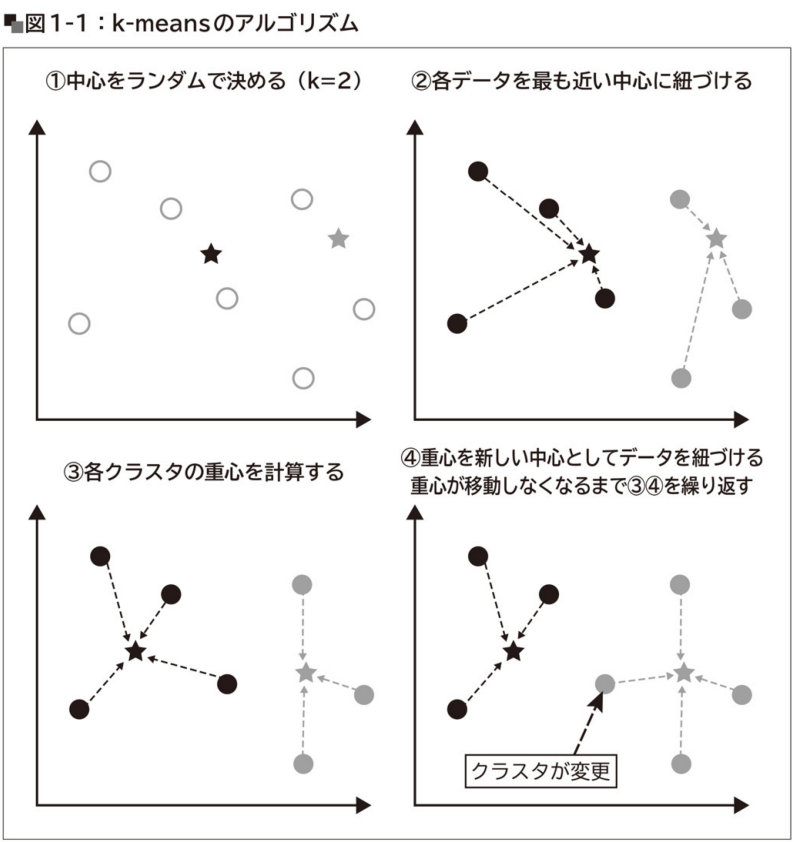

In [3]:

iris = load_iris()
print(iris.data.shape)
print(iris.target_names)

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.describe()

(150, 4)
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


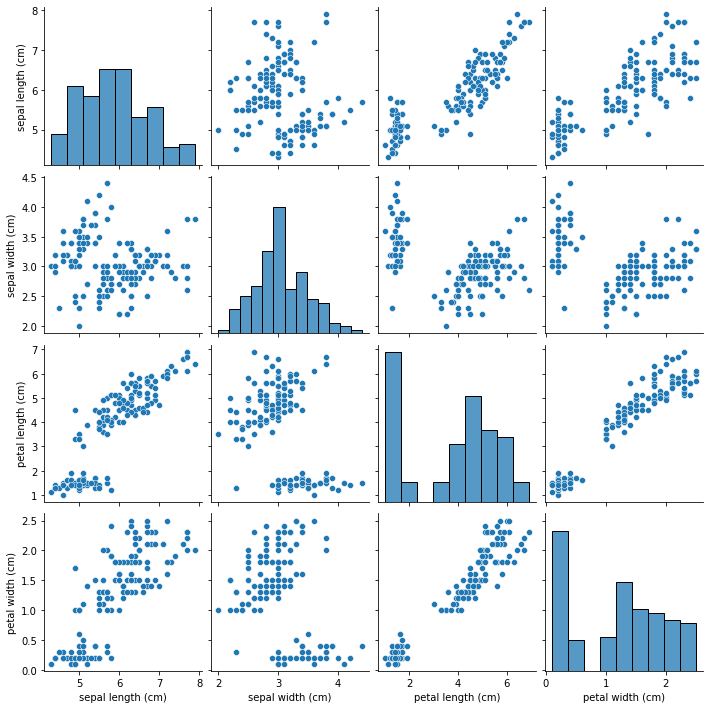

In [4]:
df_temp = iris_df.copy()
# 変数の散布図
sns.pairplot(df_temp)


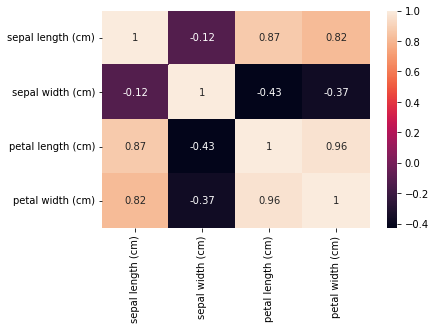

In [5]:
df_temp_corr = df_temp.corr()
sns.heatmap(df_temp_corr, annot=True)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


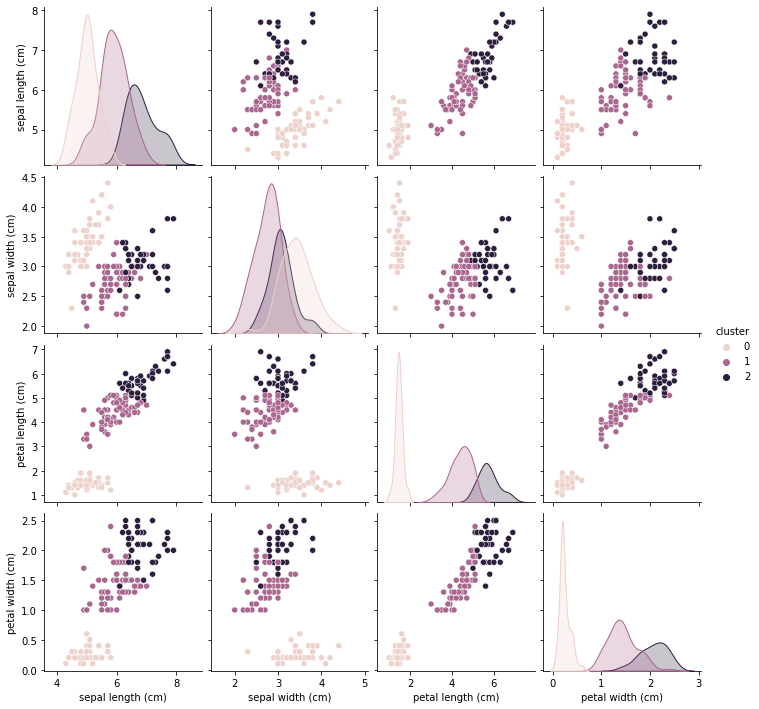

In [6]:
model = KMeans(n_clusters=3, random_state=0, init='random')
cls_data = iris_df.copy()
model.fit(cls_data)
cluster = model.predict(cls_data)
print(cluster)

cls_data['cluster'] = cluster
sns.pairplot(cls_data, hue='cluster')

In [7]:
cluster_center = pd.DataFrame(model.cluster_centers_)
cluster_center.columns = cls_data.columns[:4]
display(cluster_center)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


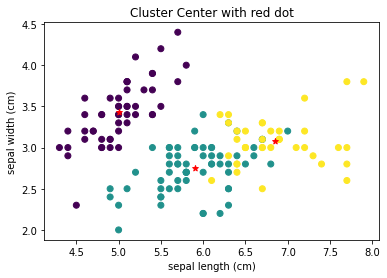

In [8]:
plt.scatter(cls_data['sepal length (cm)'], cls_data['sepal width (cm)'], c=cls_data['cluster'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Cluster Center with red dot')
plt.scatter(cluster_center['sepal length (cm)'], cluster_center['sepal width (cm)'], marker='*', color='red')

In [9]:
display(cls_data.groupby('cluster').mean().round(2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,5.01,3.43,1.46,0.25
1,5.90,2.75,4.39,1.43
2,6.85,3.07,5.74,2.07


In [10]:
cls_data['target'] = iris.target
# ['setosa' 'versicolor' 'virginica']
cls_data.loc[cls_data['target'] == 0, 'target'] = 'setosa'
cls_data.loc[cls_data['target'] == 1, 'target'] = 'versicolor'
cls_data.loc[cls_data['target'] == 2, 'target'] = 'virginica'
display(cls_data.groupby('target').mean().round(2))
# display(cls_data)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
target,,,,,
setosa,5.01,3.43,1.46,0.25,0.00
versicolor,5.94,2.77,4.26,1.33,1.04
virginica,6.59,2.97,5.55,2.03,1.72


## 1.2 Evaluate clustering result

In [11]:
# 調整ランド指数(Ajusted Rand Index)
ari = 'ARI: {}'.format(adjusted_rand_score(iris.target, cls_data['cluster']))
# 正解率
accuracy = 'Accuracy: {}'.format(accuracy_score(iris.target, cls_data['cluster']))
print(ari)
print(accuracy)

ARI: 0.7302382722834697
Accuracy: 0.8933333333333333


## 1.3 非階層型クラスタリング with k-means++ 

`init=random` では、初期のクラスターセンターをランダムに設定されていたが、

`init=k-means++` では、初期のクラスターセンターをお互いに離れた位置に配置する


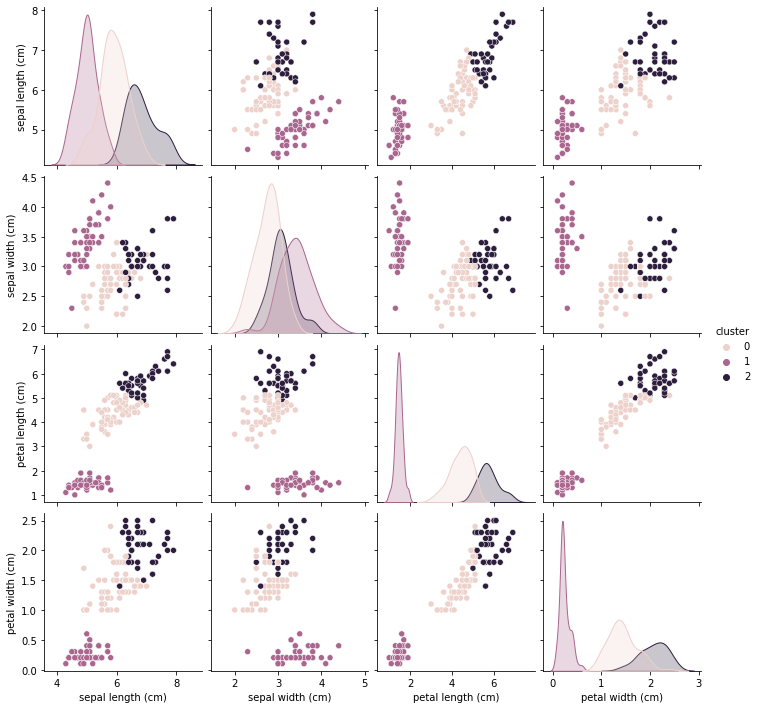

In [12]:
model = KMeans(n_clusters=3, random_state=0, init='k-means++')
cls_data = iris_df.copy()
model.fit(cls_data)
cluster = model.predict(cls_data)
# cluster
cls_data['cluster'] = cluster
sns.pairplot(cls_data, hue='cluster')

In [13]:
ari = 'ARI: {:.2f}'.format(adjusted_rand_score(iris.target, cls_data['cluster']))
accuracy = 'Accuracy: {:.2f}'.format(accuracy_score(iris.target, cls_data['cluster']))

print(ari)
print(accuracy)

ARI: 0.73
Accuracy: 0.24


## 1.4 エルボー法で最適なクラスター数を探索

k-meansの問題点は、cluster数を指定しなければいけないところ

クラスタリングの性能を数値化するには、クラスタ内の残差平方和(SSE Sum of Squared errors of prediction)のような指標を用いて、k-meansクラスタリングの性能を比較する必要がある

エルボー法: クラスタ数を変えながらSSEを計算し、結果を図示する方法

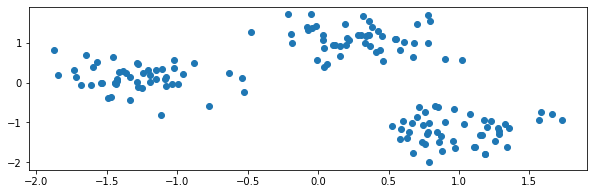

In [14]:
from sklearn.datasets import make_blobs
from sklearn import cluster, preprocessing
# create sample data
X, y = make_blobs(n_samples=150, # サンプル点の総数
                  n_features=2,  # 説明変数(次元数)
                  centers=3,     # クラスタの個数
                  cluster_std=0.5, # クラスタ内の標準偏差
                  shuffle=True,
                  random_state=0,
                  )
sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
x = X_norm[:, 0]
y = X_norm[:, 1]

plt.figure(figsize=(10,3))
plt.scatter(x, y)
plt.show()
# print("##########################")
# print(X_norm)
# print("##########################")
# print(X_norm[:, 0])

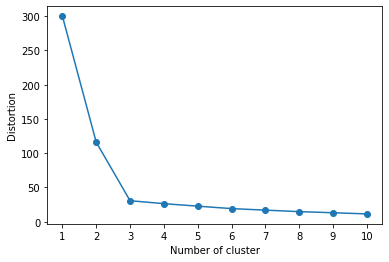

In [15]:
distortions = []
for i in range(1, 11):
  km = KMeans(n_clusters=i,
              n_init=10,
              max_iter=300,
              random_state=0)
  km.fit(X_norm)
  # check 残差平方和(SSE Sum of Squared errors of prediction)
  distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xticks(range(1,11))
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
# plt.title('エルボー図')
plt.show()



エルボー図から読み取れることが、クラスタ数3まではSSEが減少し、4以降はほぼ横ばい

よって3が最適なクラスタ数と判断することができる

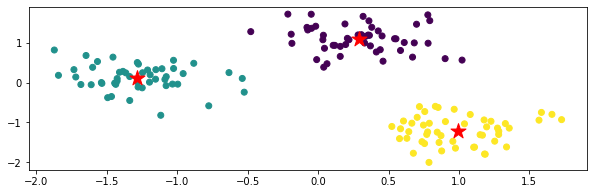

In [16]:
km = KMeans(n_clusters=3,
            n_init=10,
            max_iter=300,
            random_state=0)
z_km = km.fit(X_norm)
plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker="*",c="red")

plt.show()

## 1.5 シルエット分析で最適なクラスタ数を探索

- エルボー分析
  - 万能なツールではない

- シルエット分析
  - クラスタないは密になっているほど良い
  - 各クラスタは遠くに離れているほどよい



50
50
50


([<matplotlib.axis.YTick at 0x7f2cd23d3690>,
 [Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3')])

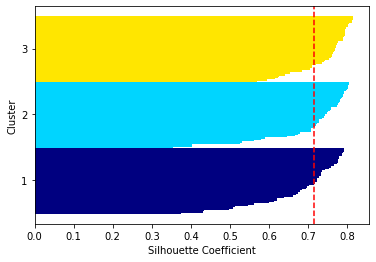

In [17]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(z_km.labels_)
# np.array([1, 2, 3]).shape
n_clusters = np.unique(cluster_labels.shape[0])
silhouette_vals = silhouette_samples(X, z_km.labels_)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i,c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[z_km.labels_==c]
  print(len(c_silhouette_vals))
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper),
           c_silhouette_vals,
           height=1.0,
           edgecolor='none',
           color=color)
  yticks.append((y_ax_lower+y_ax_upper)/2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.yticks(yticks, cluster_labels + 1)


クラスタのシルエット係数が1に近いほど、そのクラスタは他のクラスから離れていることを示している。

根茎の3つのクラスタ数でうまくクラスタリングできていることがわかる

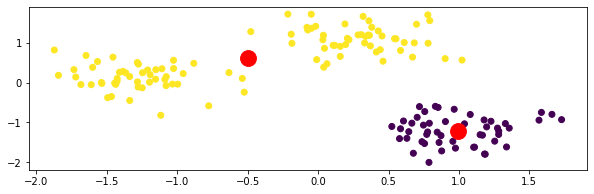

In [18]:
km = KMeans(n_clusters=2,
            n_init=10,
            max_iter=300,
            random_state=0)
z_km = km.fit(X_norm)

plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[:, 1], s=250, c='red')
plt.show()

50
50
150
150


([<matplotlib.axis.YTick at 0x7f2cd2165f90>,
 [Text(0, 0, '1'), Text(0, 0, '2')])

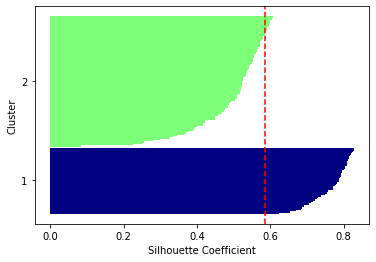

In [19]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(z_km.labels_)
# np.array([1, 2, 3]).shape
n_clusters = np.unique(cluster_labels.shape[0])
silhouette_vals = silhouette_samples(X, z_km.labels_)

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i,c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[z_km.labels_==c]
  # print(len(c_silhouette_vals))
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper),
           c_silhouette_vals,
           height=1.0,
           edgecolor='none',
           color=color)
  yticks.append((y_ax_lower+y_ax_upper)/2.)
  y_ax_lower += len(c_silhouette_vals)
  print(y_ax_lower)
  print(y_ax_upper)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.yticks(yticks, cluster_labels + 1)


cluster数を2にしたときに、上記のように係数が0.5...になることからクラスタがうまくいっていないことがわかる

## 1.6 階層型クラスタリング

階層型クラスタリングは最も距離が近くて似ている組み合わせからまとめていく手法

非階層クラスタリングよりも計算量が大きくなる傾向がある

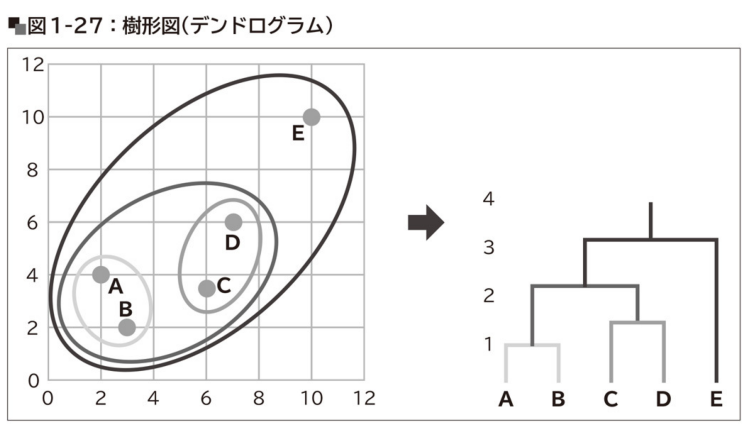

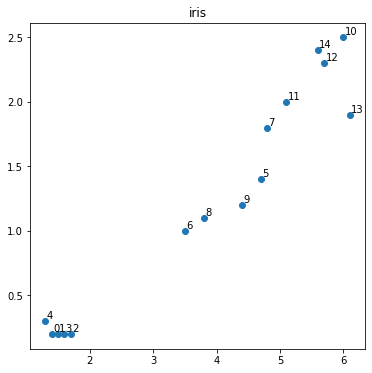

In [20]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 件数を1/10に絞って4つある説明変数のうち2つをサンプルデータとして使う
X = load_iris().data[::10, 2:4]
# print(X)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, title='iris')
plt.scatter(X[:, 0], X[:, 1])
for i, element in enumerate(X):
  plt.text(element[0]+0.02, element[1]+0.02, i)
plt.show()


In [21]:
import pandas as pd
from scipy.cluster.hierarchy import linkage

# method: 距離関数の種類
# metric: 点と点の距離の定義
Z = linkage(X, method='ward', metric='euclidean')
pd.DataFrame(Z)

,0,1,2,3
0,2.0,3.0,0.100000,2.0
1,0.0,1.0,0.100000,2.0
2,12.0,14.0,0.141421,2.0
3,4.0,16.0,0.208167,3.0
4,6.0,8.0,0.316228,2.0
5,5.0,9.0,0.360555,2.0
6,7.0,11.0,0.360555,2.0
7,15.0,18.0,0.390726,5.0
8,10.0,17.0,0.439697,3.0
9,13.0,23.0,0.735980,4.0


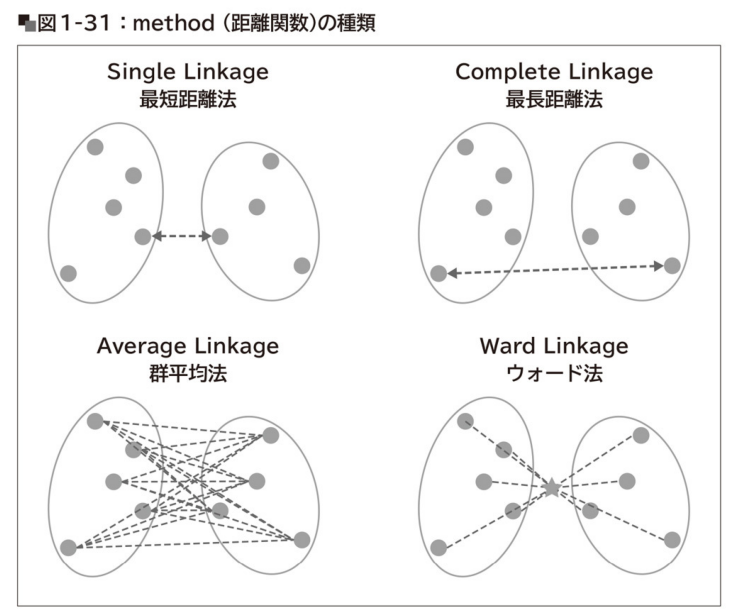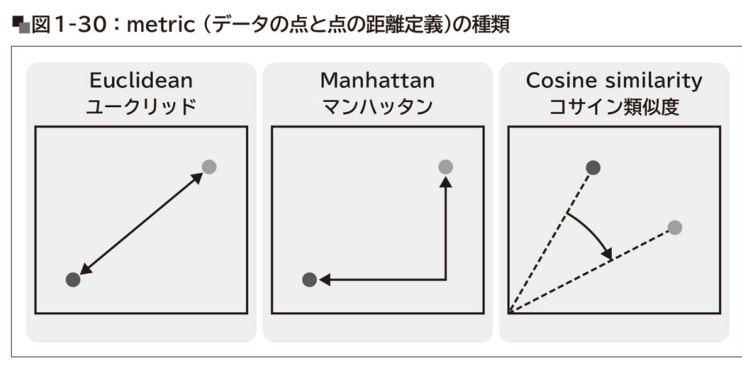

## 1.7 樹形図（デンドログラム）を解釈

階層型クラスタリングの結果で樹形図を出力

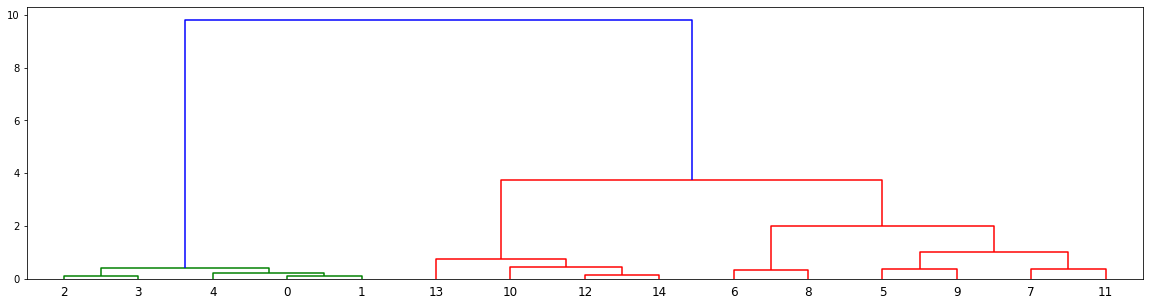

In [22]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
fig2, ax2 = plt.subplots(figsize=(20, 5))
ax2 = dendrogram(Z)

In [23]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, t=3, criterion='maxclust')
for i, c in enumerate(clusters):
  print(i, c)

0 1
1 1
2 1
3 1
4 1
5 3
6 3
7 3
8 3
9 3
10 2
11 3
12 2
13 2
14 2


## 1.8 最短距離法で階層型クラスタリングを実施

最短距離法のデンドグラムを比較

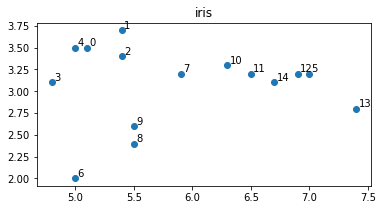

In [24]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
X = load_iris().data[::10]
X
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(1, 1, 1, title='iris')
plt.scatter(X[:, 0], X[:, 1])
for i, element in enumerate(X):
  # print(element[0], element[1])
  # print(element)
  plt.text(element[0]+0.02, element[1]+0.02, i)
plt.show()

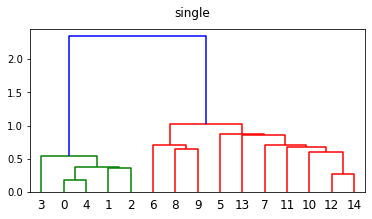

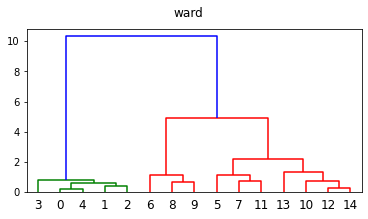

In [25]:
Z = linkage(X, method='single', metric='euclidean')
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = dendrogram(Z)
fig2.suptitle('single')
fig2.show()

Z = linkage(X, method='ward', metric='euclidean')
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = dendrogram(Z)
fig2.suptitle('ward')
fig2.show()


結果はほぼ変わらないが、ウォード法は 5, 7, 11が比較的近くなっている

最短距離法のメリットは計算量が少ないことだが、鎖効果によりクラスタがクラスタが帯状になってしまい、分類感度が低い

## 1.9 最長距離法

最長距離法は完全リンク法(complete linkage)とも呼ばれ、各クラスタにおいて一番遠い点同士の距離をクラスタの距離とする手法

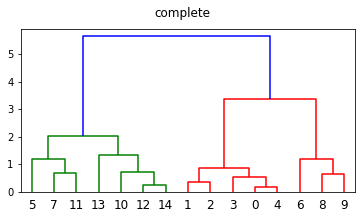

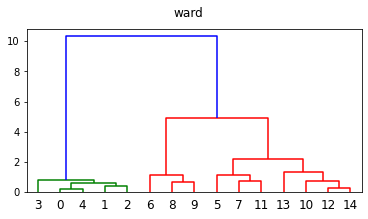

In [26]:
Z = linkage(X, method='complete', metric='euclidean')
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = dendrogram(Z)
fig2.suptitle('complete')
fig2.show()

Z = linkage(X, method='ward', metric='euclidean')
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = dendrogram(Z)
fig2.suptitle('ward')
fig2.show()

6, 8, 9のグループが入れ替わっている

最長距離法は計算量も少なく、分類感度も比較的高いが、クラスタ同士が離れてしまう拡散現象が生じることがある

## 1.10 郡平均法で階層型クラスタリングを実施

距離関数を郡平均法に変更することでどのように変わるかを確認する

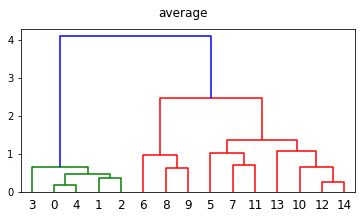

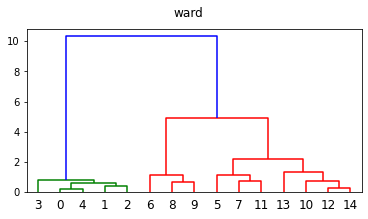

In [27]:
Z = linkage(X, method='average', metric='euclidean')
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = dendrogram(Z)
fig2.suptitle('average')
fig2.show()

Z = linkage(X, method='ward', metric='euclidean')
fig2, ax2 = plt.subplots(figsize=(6,3))
ax2 = dendrogram(Z)
fig2.suptitle('ward')
fig2.show()

ward法と同様の結果を得ることができることがわかった